# Case Study - Credit EDA - Part 1

__Submitted by:__ Janarthanan Balasubramanian and Siva Prakash

## Business Understanding

We are provided with the data sets from a consumer finance company, which specialises in lending various types of loans to urban customers. The challenge is to __identify the clients who are capable of repaying their loans__ so that their loan applications are not rejected.

When a loan application is received, the company has to decide for loan approval based on the applicant’s profile. There are two associated risks. (1) Not approving the loan for an applicant who is likely to repay the loan. (2) Approving the loan for an applicant who is not likely to repay the loan. The objective of __risk assessment__ is to understand how consumer attributes and loan attributes influence the tendency of default, i.e. the variables which are strong indicators of default. If a client is identified to be having difficulty in paying their instalments, the company can take further actions such as denying the loan, reducing the amount of loan, lending at a higher interest rate, etc.

## Datasets

We received 3 data files: 
 - __application_data.csv__ that had all the information of the client at the time of application. 
 - __previous_application.csv__	that had information about the client’s previous loan data: whether the previous application had been Approved, Cancelled, Refused or Unused.
 - __columns_description.csv__ - the data dictionary, describing the meaning of different variables.

In [1]:
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data_path = os.getcwd()

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.rcParams.update(plt.rcParamsDefault)

## Step 1: Loading the Data Sets

In [4]:
# Loading the data dictionary

data_dict = pd.read_csv(data_path+'\\DataSets\\columns_description.csv', encoding = "ISO-8859-1")

In [5]:
# Splitting Data Dictionary into two data frames 

dd_application_data = data_dict[data_dict.Table == 'application_data']

dd_previous_application = data_dict[data_dict.Table == 'previous_application.csv']

In [6]:
# Loading the application_data.csv

df_application_data = pd.read_csv(data_path+'\\DataSets\\application_data.csv', encoding = "ISO-8859-1")

In [7]:
# Loading the previous_application.csv

df_previous_application = pd.read_csv(data_path+'\\DataSets\\previous_application.csv', encoding = "ISO-8859-1")

## Step 2: Exploring the Data Sets

### Step 2A: Exploring Application Data (application_data.csv)

In [8]:
df_application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
df_application_data.shape # Returns the number of rows and columns in the dataset

(307511, 122)

In [10]:
df_application_data.describe() # To study the numeric variables

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [11]:
print(round(100*(df_application_data.isnull().sum()/len(df_application_data)))) # Percentage of null values

SK_ID_CURR                       0.0
TARGET                           0.0
NAME_CONTRACT_TYPE               0.0
CODE_GENDER                      0.0
FLAG_OWN_CAR                     0.0
FLAG_OWN_REALTY                  0.0
CNT_CHILDREN                     0.0
AMT_INCOME_TOTAL                 0.0
AMT_CREDIT                       0.0
AMT_ANNUITY                      0.0
AMT_GOODS_PRICE                  0.0
NAME_TYPE_SUITE                  0.0
NAME_INCOME_TYPE                 0.0
NAME_EDUCATION_TYPE              0.0
NAME_FAMILY_STATUS               0.0
NAME_HOUSING_TYPE                0.0
REGION_POPULATION_RELATIVE       0.0
DAYS_BIRTH                       0.0
DAYS_EMPLOYED                    0.0
DAYS_REGISTRATION                0.0
DAYS_ID_PUBLISH                  0.0
OWN_CAR_AGE                     66.0
FLAG_MOBIL                       0.0
FLAG_EMP_PHONE                   0.0
FLAG_WORK_PHONE                  0.0
FLAG_CONT_MOBILE                 0.0
FLAG_PHONE                       0.0
F

__Observation:__ The application_data.csv file has __122__ columns and __307511__ rows. 

In [12]:
dd_application_data # data dictionary for understanding application_data.csv

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


After studying the data dictionary, we bifurcated this dataset into 4 different data frames for further exploration.
 
 - applicant_profile: Various attributes of the client and the loan they applied for. 
 - applicant_region: Information about the region in which the client lives.
 - applicant_building_info: Normalized statistical information about the building in which the client lives.
 - applicant_documents: Flags set based on the details and documents submitted by the client. 

In [13]:
# Most of the significant variables are captured here

applicant_profile = ['SK_ID_CURR', 
'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 
'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 
'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'OWN_CAR_AGE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 
'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 
'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

df_applicant_profile = df_application_data[applicant_profile]

In [14]:
# Attributes related to the region in whch the client lives - we will not use them for analysis

applicant_region = ['SK_ID_CURR',
'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 
'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

df_applicant_region = df_application_data[applicant_region]

In [15]:
# Normalized statistical information about the building in which the client lives - there are 47 such columns.
# Mean, median and mode of various parameters like apartment size, common area, living area, age of building, 
# number of elevators, number of entrances, state of the building, number of floor etc.
# We are not using these fields for analysis

applicant_building_info = ['SK_ID_CURR',
'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

df_applicant_building_info = df_application_data[applicant_building_info]

In [16]:
# Flags related to what details and documents that the applicant has submitted
# There are 20 columns that specify whether the client has submitted certain documents or not. 
# Further there are 6 flags to indicate whether the client has shared specific details.
# We are not using these fields for analysis

applicant_documents = ['SK_ID_CURR',
'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

df_applicant_documents = df_application_data[applicant_documents]

We will consider only the __applicant_profile__ which contains various attributes about the client for further analysis.

`df_applicant_profile[Column Name].value_counts()`

__TARGET:__	Target variable. No null values. It segregates client with payment difficulties (1) from other cases (0). The clients who had payment difficulties had made late payment more than X days on at least one of the first Y instalments of the loan in our sample. 

 - 1 - client with payment difficulties (24825 records);
 - 0 - all other cases (282686 records)
 
__CODE_GENDER:__ 4 records are having value XNA.

 - F: 202448
 - M: 105059
 - XNA: 4

__ORGANIZATION_TYPE:__ Type of organization where client works.
 
__OCCUPATION_TYPE:__ What kind of occupation does the client have. There are 96391 null values. We will update it as Unknown. 

 - Laborers: 55186
 - Sales staff: 32102
 - Core staff: 27570
 - Managers: 21371
 - Drivers: 18603
 - High skill tech staff: 11380
 - Accountants: 9813
 - Medicine staff: 8537
 - Security staff: 6721
 - Cooking staff: 5946
 - Cleaning staff: 4653
 - Private service staff: 2652
 - Low-skill Laborers: 2093
 - Waiters/barmen staff: 1348
 - Secretaries: 1305
 - Realty agents: 751
 - HR staff: 563
 - IT staff: 526

__NAME_INCOME_TYPE:__ What is the source of income for the client. There are no null values. 

 - Working: 158774
 - Commercial associate: 71617
 - Pensioner: 55362
 - State servant: 21703
 - Unemployed: 22
 - Student: 18
 - Businessman: 10
 - Maternity leave: 5
 
__NAME_FAMILY_STATUS:__ Family status of the client - Married, Single, Civil Marriage, Separated, Widow, Unknown.

 - Married: 196432
 - Single / not married: 45444
 - Civil marriage: 29775
 - Separated: 19770
 - Widow: 16088
 - Unknown: 2

__FLAG_OWN_REALTY:__ Whether the client lives in own house. No null values. Y: 213312  N: 94199

__NAME_HOUSING_TYPE:__ What is the housing situation of the client - House / apartment, With parents, Municipal apartment, Rented apartment, Office apartment or Co-op apartment. No null values.

 - House / apartment: 272868
 - With parents: 14840
 - Municipal apartment: 11183
 - Rented apartment: 4881
 - Office apartment:  2617
 - Co-op apartment: 1122

__FLAG_OWN_CAR:__ Whether the client owns a car. No null values. N: 202924 Y: 104587

__NAME_EDUCATION_TYPE:__ Level of highest education the client achieved. This is an ordinal categorical variable
 
 - Secondary / secondary special: 218391
 - Higher education: 74863
 - Incomplete higher: 10277
 - Lower secondary: 3816
 - Academic degree: 164

 
__Quantitative Variables:__

 - AMT_INCOME_TOTAL - Total Income of the Client
 - CNT_CHILDREN - Number of children
 - CNT_FAM_MEMBERS - Number of family members
 - DAYS_BIRTH - Client's age in days at the time of application
 - DAYS_EMPLOYED - How many days before the application the person started current employment
 - DAYS_REGISTRATION - How many days before the application did client change his registration
 - DAYS_ID_PUBLISH - How many days before the application did client change the identity document with which he applied for the loan
 - OWN_CAR_AGE: If the client owns a car, what is the age of the car.
 
__Information connected to the loan the client has applied for__

 - Contract Type: Cash / Revolving - A loan is typically repaid through fixed monthly payments. Each monthly payment includes both principal and interest. Revolving loan is a type of loan that does not have a fixed number of payments. It is an arrangement which allows for the loan amount to be withdrawn, repaid, and redrawn again in any manner and any number of times, until the arrangement expires.
 - Credit Amount
 - Annuity Amount
 - Price of the goods for which the loan is given
 - Who was accompanying client when he was applying for the loan
 - On which day of the week did the client apply for the loan
 - Approximately at what hour did the client apply for the loan
 


In [17]:
(df_application_data.isnull()).sum(axis = 0) # Check the fields that have null values 

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [18]:
print(round(100*(df_application_data.isnull().sum()/len(df_application_data)))) # Percentage of values which are null

SK_ID_CURR                       0.0
TARGET                           0.0
NAME_CONTRACT_TYPE               0.0
CODE_GENDER                      0.0
FLAG_OWN_CAR                     0.0
FLAG_OWN_REALTY                  0.0
CNT_CHILDREN                     0.0
AMT_INCOME_TOTAL                 0.0
AMT_CREDIT                       0.0
AMT_ANNUITY                      0.0
AMT_GOODS_PRICE                  0.0
NAME_TYPE_SUITE                  0.0
NAME_INCOME_TYPE                 0.0
NAME_EDUCATION_TYPE              0.0
NAME_FAMILY_STATUS               0.0
NAME_HOUSING_TYPE                0.0
REGION_POPULATION_RELATIVE       0.0
DAYS_BIRTH                       0.0
DAYS_EMPLOYED                    0.0
DAYS_REGISTRATION                0.0
DAYS_ID_PUBLISH                  0.0
OWN_CAR_AGE                     66.0
FLAG_MOBIL                       0.0
FLAG_EMP_PHONE                   0.0
FLAG_WORK_PHONE                  0.0
FLAG_CONT_MOBILE                 0.0
FLAG_PHONE                       0.0
F

In [19]:
df_application_data.nunique() # Check unique values in each field

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

### Step 2B: Exploring the Previous Applications (previous_application.csv)

In [20]:
df_previous_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_previous_application.shape # Returns the rows and columns in the dataset

(1670214, 37)

In [22]:
df_previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [23]:
print(round(100*(df_previous_application.isnull().sum()/len(df_previous_application)))) # Percentage of null values

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

__Observation:__ The previous_application.csv file has __37__ columns and __1670214__ rows. Note that the maximum number of rows that can be loaded into a spreadsheet in MS-Excel 2016 is 1,048,576. The data set is huge and is not possible to use MS-Excel for analyzing this data.

In [24]:
dd_previous_application # data dictionary for understanding previous_application.csv

,Unnamed: 0,Table,Row,Description,Special
122,176,previous_application.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
123,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
124,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
125,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
126,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
127,181,previous_application.csv,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
128,182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
129,183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
130,184,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN
131,185,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...,rounded


After studying the different columns in this data set, we seggregated into essential and additional info:
We will only consider the record which has the following flags set (to omit error records):
 
__FLAG_LAST_APPL_PER_CONTRACT:__ Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract. 8475 records out of 1670214 have N.

__NFLAG_LAST_APPL_IN_DAY:__ Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice. 5900 records of 1670214 have 0.

When we remove the records with FLAG_LAST_APPL_PER_CONTRACT = 'N' and NFLAG_LAST_APPL_IN_DAY = 0 we get 1660953 records.

In [25]:
df_prev_app = df_previous_application.loc[(df_previous_application['FLAG_LAST_APPL_PER_CONTRACT'] == 'Y') &
                                          (df_previous_application['NFLAG_LAST_APPL_IN_DAY'] == 1)]

In [26]:
df_prev_app.shape

(1660953, 37)

In [27]:
prev_app_essential = ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 
                      'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 
                      'NAME_CASH_LOAN_PURPOSE', 'NAME_PRODUCT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 
                      'NAME_CLIENT_TYPE', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

df_prev_app_essential = df_prev_app[prev_app_essential]

In [28]:
prev_app_additional = ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_DOWN_PAYMENT', 'DAYS_FIRST_DRAWING',
                       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 
                       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION', 
                       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'NFLAG_INSURED_ON_APPROVAL',
                       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

df_prev_app_additional = df_prev_app[prev_app_additional]

RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED: 1664263 null values (cannot be used for analysis)

We studied these essential fields with `df_prev_app_essential[column].value_counts()`

__SK_ID_PREV:__ Unique id of the application

__SK_ID_CURR:__ This field is used to link with the application_data

__NAME_CONTRACT_TYPE:__ Type of the Load: Cash Loan, Consumer Loan or Revolving Loan

 - Cash loans: 747147
 - Consumer loans: 728870
 - Revolving loans: 184590
 - XNA: 346

__AMT_APPLICATION:__ For how much credit did client ask on the previous application

__AMT_CREDIT:__ Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount.

__AMT_DOWN_PAYMENT:__ Down payment on the previous application. __886863__ null values.

__NAME_CONTRACT_STATUS:__ Status of the previous application. Approved / Canceled / Refused / Unused Offer

 - Approved - 1036044
 - Canceled - 316317
 - Refused - 282169
 - Unused Offer - 26423
  
__DAYS_DECISION:__ Relative to current application when was the decision about previous application made

__NAME_PAYMENT_TYPE:__ Payment method that client chose to pay for the previous application

 - Cash through the bank: 1032927
 - XNA: 618752
 - Non-cash from your account: 8189
 - Cashless from the account of the employer: 1085

__CODE_REJECT_REASON:__ Why was the previous application rejected. For approved or canceled loans these fields have XAP or XNA (1352361 records). Among the records where the loan was refused, we have 4110 records that has the value XNA.

 - XAP: 1352353
 - HC: 170053
 - LIMIT: 54970
 - SCO: 37115
 - CLIENT: 26423
 - SCOFR: 12294
 - XNA: 4118
 - VERIF: 3430
 - SYSTEM: 197

__NAME_CLIENT_TYPE:__ New or Repeat Client. We can identify the first loan given to the client with the record that has NAME_CLIENT_TYPE = 'New'.

 - Repeater: 1222935
 - New: 301199
 - Refreshed: 134882
 - XNA: 1937
 
__NAME_TYPE_SUITE:__ Who accompanied client when applying for the previous application. __813172__ null values. 
 
 - Unaccompanied: 507349
 - Family: 212987
 - Spouse, partner: 66992
 - Children: 31537
 - Other_B: 17608
 - Other_A: 9071
 - Group of people: 2237

__CNT_PAYMENT:__ Term of the previous credit. 372213 null values. For canceled, refused or unused offer, this field need not have any value. Approved loans should have the term details. 4 records are having null values.

__NAME_YIELD_GROUP:__ Grouped interest rate into small medium and high of the previous application

 - XNA: 508628
 - middle: 385170
 - high: 353195
 - low_normal: 321961
 - low_action: 91999
 
__DAYS_LAST_DUE:__ Relative to application date of current application when was the last due date of the previous application. __664513__ null values.

__DAYS_TERMINATION:__ Relative to application date of current application when was the expected termination of the previous application. __664513__ null values.

The null values correspond to the canceled, refused and unused offers. Only 39604 approved loans have null values in these fields.

In [29]:
(df_prev_app_essential.isnull()).sum(axis = 0) # Check the fields that have null values 

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_ANNUITY               372214
AMT_GOODS_PRICE           380429
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
NAME_CASH_LOAN_PURPOSE         0
NAME_PRODUCT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE           813172
NAME_CLIENT_TYPE               0
CNT_PAYMENT               372213
NAME_YIELD_GROUP               0
DAYS_LAST_DUE             664513
DAYS_TERMINATION          664513
dtype: int64

In [30]:
print(round(100*(df_prev_app_essential.isnull().sum()/len(df_prev_app_essential)))) # % of values which are null

SK_ID_PREV                 0.0
SK_ID_CURR                 0.0
NAME_CONTRACT_TYPE         0.0
AMT_APPLICATION            0.0
AMT_CREDIT                 0.0
AMT_ANNUITY               22.0
AMT_GOODS_PRICE           23.0
NAME_CONTRACT_STATUS       0.0
DAYS_DECISION              0.0
NAME_PAYMENT_TYPE          0.0
NAME_CASH_LOAN_PURPOSE     0.0
NAME_PRODUCT_TYPE          0.0
CODE_REJECT_REASON         0.0
NAME_TYPE_SUITE           49.0
NAME_CLIENT_TYPE           0.0
CNT_PAYMENT               22.0
NAME_YIELD_GROUP           0.0
DAYS_LAST_DUE             40.0
DAYS_TERMINATION          40.0
dtype: float64


In [31]:
df_prev_app_essential.nunique() # Check unique values in each field

SK_ID_PREV                1660953
SK_ID_CURR                 338810
NAME_CONTRACT_TYPE              4
AMT_APPLICATION             93866
AMT_CREDIT                  86786
AMT_ANNUITY                357877
AMT_GOODS_PRICE             93866
NAME_CONTRACT_STATUS            4
DAYS_DECISION                2922
NAME_PAYMENT_TYPE               4
NAME_CASH_LOAN_PURPOSE         25
NAME_PRODUCT_TYPE               3
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
CNT_PAYMENT                    49
NAME_YIELD_GROUP                5
DAYS_LAST_DUE                2873
DAYS_TERMINATION             2830
dtype: int64

## 3. Handling Missing Values

We have two datasets now: df_applicant_profile and df_prev_app_essential. Before further analysis, we will handle the missing values.

### Step 3A: Handling the Missing Values in Applicant Profile

In [32]:
# Most of the significant variables are captured here

applicant_profile = ['SK_ID_CURR', 
'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 
'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 
'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'OWN_CAR_AGE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 
'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 
'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

df_applicant_profile = df_application_data[applicant_profile]

In [33]:
(df_applicant_profile.isnull()).sum(axis = 0)

SK_ID_CURR                         0
TARGET                             0
CODE_GENDER                        0
AMT_INCOME_TOTAL                   0
OCCUPATION_TYPE                96391
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
ORGANIZATION_TYPE                  0
FLAG_OWN_REALTY                    0
FLAG_OWN_CAR                       0
OWN_CAR_AGE                   202929
CNT_CHILDREN                       0
CNT_FAM_MEMBERS                    2
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
DAYS_LAST_PHONE_CHANGE             1
NAME_CONTRACT_TYPE                 0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
d

We will drop the following columns which we will not be using for analysis.

 - DAYS_LAST_PHONE_CHANGE
 - WEEKDAY_APPR_PROCESS_START
 - HOUR_APPR_PROCESS_START
 - DAYS_REGISTRATION
 - DAYS_ID_PUBLISH 

In [34]:
df_applicant_profile = df_applicant_profile.drop(['DAYS_LAST_PHONE_CHANGE', 
                                                  'WEEKDAY_APPR_PROCESS_START', 
                                                  'HOUR_APPR_PROCESS_START', 
                                                  'DAYS_REGISTRATION',
                                                  'DAYS_ID_PUBLISH'], axis = 1) 

__CODE_GENDER:__ 4 XNA values. We will update it with the mode (F).

In [35]:
df_applicant_profile['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [36]:
df_applicant_profile.loc[df_applicant_profile['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'

__ORGANIZATION_TYPE:__ No null values. But there are fields with value XNA. Can be replaced with 'Other'.

In [37]:
df_applicant_profile['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [38]:
df_applicant_profile.loc[df_applicant_profile['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = 'Other'

__OCCUPATION_TYPE:__ 96391 null values. We will update it as Unknown.

In [39]:
df_applicant_profile['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [40]:
df_applicant_profile.loc[df_applicant_profile['OCCUPATION_TYPE'].isnull() == True, 'OCCUPATION_TYPE'] = 'Unknown'

__CNT_FAM_MEMBERS:__ 2 null values. We will update it with median value 2.

In [41]:
df_applicant_profile['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [42]:
df_applicant_profile.loc[df_applicant_profile['CNT_FAM_MEMBERS'].isnull() == True, 'CNT_FAM_MEMBERS'] = 2

__NAME_TYPE_SUITE:__ 1292 null values. We will update it as Unaccompanied.

In [43]:
df_applicant_profile['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [44]:
df_applicant_profile.loc[df_applicant_profile['NAME_TYPE_SUITE'].isnull() == True, 'NAME_TYPE_SUITE'] = 'Unaccompanied'

__AMT_GOODS_PRICE:__ 278 null values. All the null values are corresponding to the Revolving Loans. We will assume that AMT_GOODS_PRICE in these cases are equal to the AMT_CREDIT.

In [45]:
df_applicant_profile['AMT_GOODS_PRICE'].sum()

165413081997.0

In [46]:
df_applicant_profile[df_applicant_profile['AMT_GOODS_PRICE'].isnull() == True]['AMT_CREDIT'].sum()

77737500.0

In [47]:
df_applicant_profile.loc[df_applicant_profile['AMT_GOODS_PRICE'].isnull() == True, 'AMT_GOODS_PRICE'] = df_applicant_profile['AMT_CREDIT']

In [48]:
df_applicant_profile['AMT_GOODS_PRICE'].sum()

165490819497.0

__AMT_ANNUITY:__ 12 null values. Approximately (in most of the records) this is 1/20 of the AMT_GOODS_PRICE for Revolving Loans. But the null values are corresponding to cash loans where there is no such relationship. It is better to drop these 12 rows than it affecting our analysis.

In [49]:
df_applicant_profile = df_applicant_profile.drop(df_applicant_profile[df_applicant_profile['AMT_ANNUITY'].isnull() == True].index)

__OWN_CAR_AGE:__ Those who do not own car, for them this value is null. If this value is NULL we will mark FLAG_OWN_CAR = N (this is done to ensure consistency in the dataset).

In [50]:
df_applicant_profile['FLAG_OWN_CAR'].value_counts()

N    202915
Y    104584
Name: FLAG_OWN_CAR, dtype: int64

In [51]:
df_applicant_profile.loc[df_applicant_profile['OWN_CAR_AGE'].isnull() == True, 'OWN_CAR_AGE'] = 0

In [52]:
df_applicant_profile.loc[(df_applicant_profile['FLAG_OWN_CAR'] == 'Y' ) & 
                         (df_applicant_profile['OWN_CAR_AGE'] == 0), 'FLAG_OWN_CAR'] = 'N'

In [53]:
(df_applicant_profile.isnull()).sum(axis = 0)

SK_ID_CURR             0
TARGET                 0
CODE_GENDER            0
AMT_INCOME_TOTAL       0
OCCUPATION_TYPE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
ORGANIZATION_TYPE      0
FLAG_OWN_REALTY        0
FLAG_OWN_CAR           0
OWN_CAR_AGE            0
CNT_CHILDREN           0
CNT_FAM_MEMBERS        0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
NAME_CONTRACT_TYPE     0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
dtype: int64

In [54]:
df_applicant_profile.shape

(307499, 22)

<font color = red> __The above code is just meant for demonstration. For further analysis we will use the original data without any imputation.__ </font>

In [55]:
# Most of the significant variables are captured here

applicant_profile = ['SK_ID_CURR', 
'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 
'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 
'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'OWN_CAR_AGE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 
'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 
'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

df_applicant_profile = df_application_data[applicant_profile]

### Step 3B: Handling Missing Values in Previous Applications

In [56]:
(df_prev_app_essential.isnull()).sum(axis = 0)

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_ANNUITY               372214
AMT_GOODS_PRICE           380429
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
NAME_CASH_LOAN_PURPOSE         0
NAME_PRODUCT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE           813172
NAME_CLIENT_TYPE               0
CNT_PAYMENT               372213
NAME_YIELD_GROUP               0
DAYS_LAST_DUE             664513
DAYS_TERMINATION          664513
dtype: int64

__AMT_DOWN_PAYMENT:__ Down payment on the previous application. __886863__ null values.

__CODE_REJECT_REASON:__ Why was the previous application rejected. For approved or canceled loans these fields have XAP or XNA (1352361 records). Among the records where the loan was refused, we have 4110 records that has the value XNA.

__CNT_PAYMENT:__ Term of the previous credit. 372213 null values. For canceled, refused or unused offer, this field need not have any value. Approved loans should have the term details. 4 records are having null values.

__DAYS_LAST_DUE:__ Relative to application date of current application when was the last due date of the previous application. __664513__ null values.

__DAYS_TERMINATION:__ Relative to application date of current application when was the expected termination of the previous application. __664513__ null values.

The null values in NAME_TYPE_SUITE can be updated as 'Unaccompanied' (mode). The other null values are connected to the loans that are refused or unused or canceled. No action required. Only 39604 approved loans have null values in DAYS_LAST_DUE, DAYS_TERMINATION. These records can be dropped.

## Step 4: Univariate Analysis - Application Data

In [57]:
catvar = ['TARGET', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 
          'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
          'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE',
          'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE']

numvar = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
          'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

### 4A. Categorical Variables & Bar Charts:

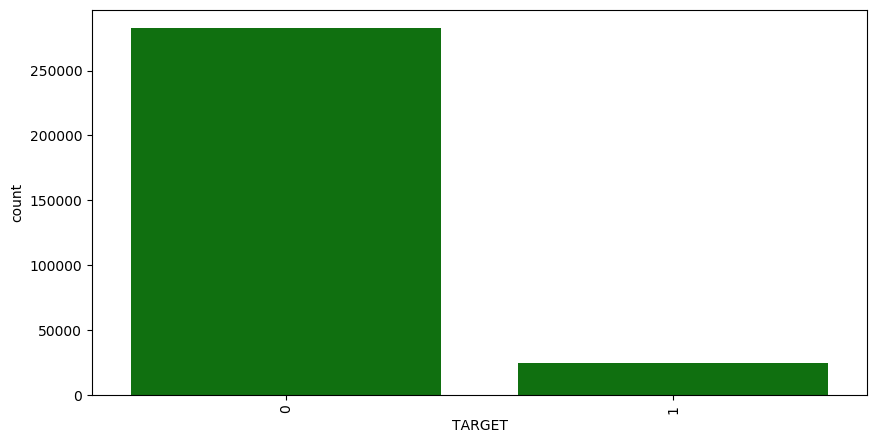

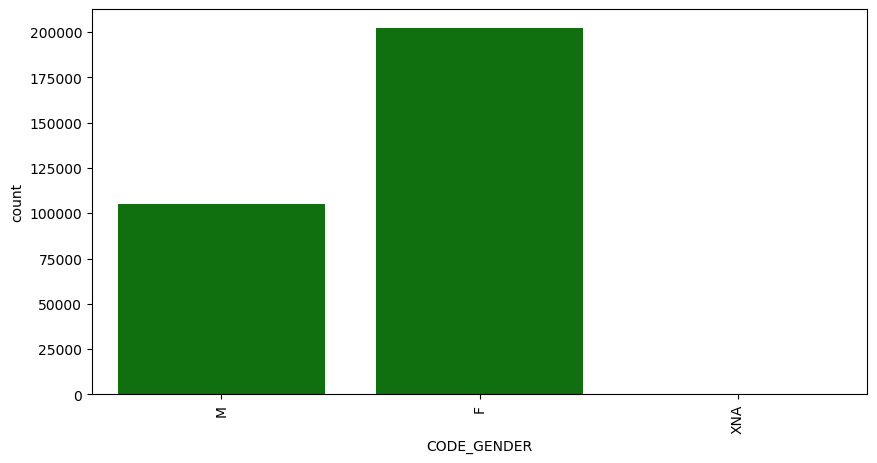

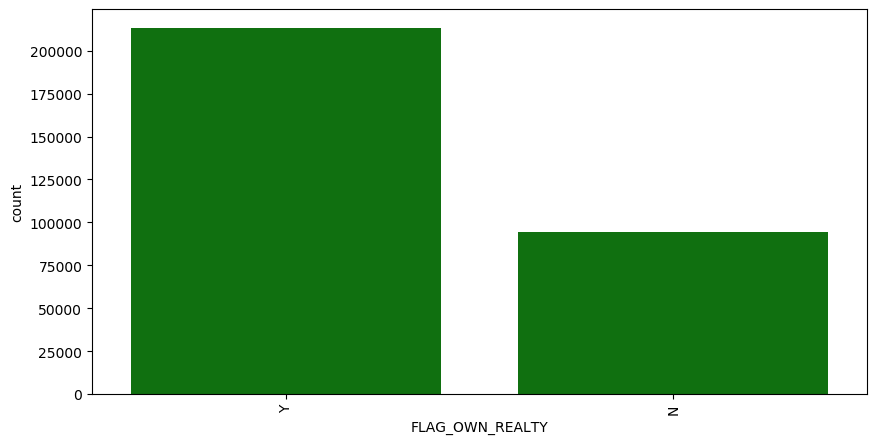

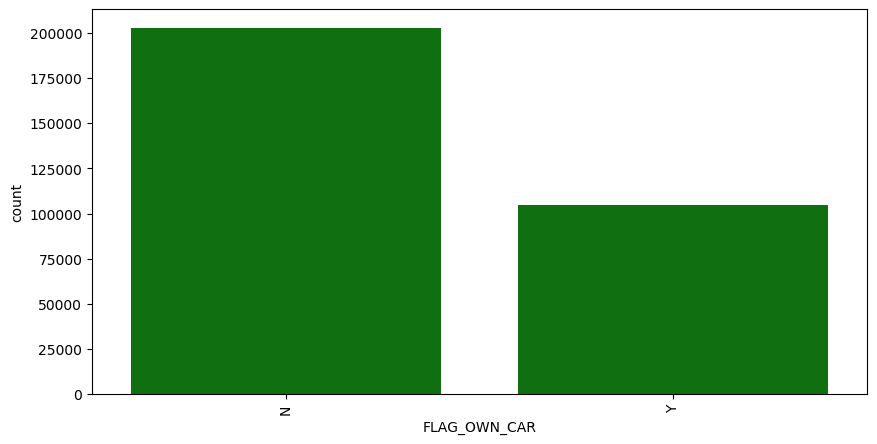

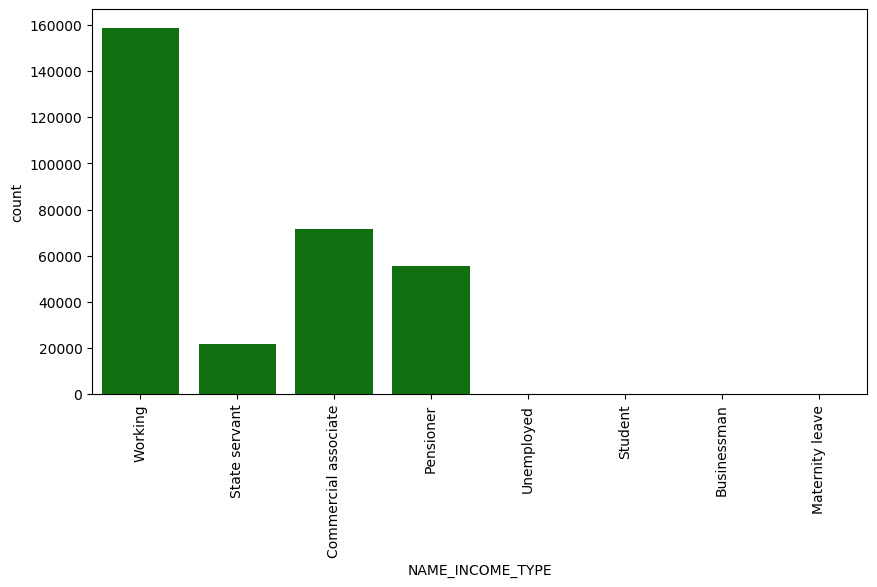

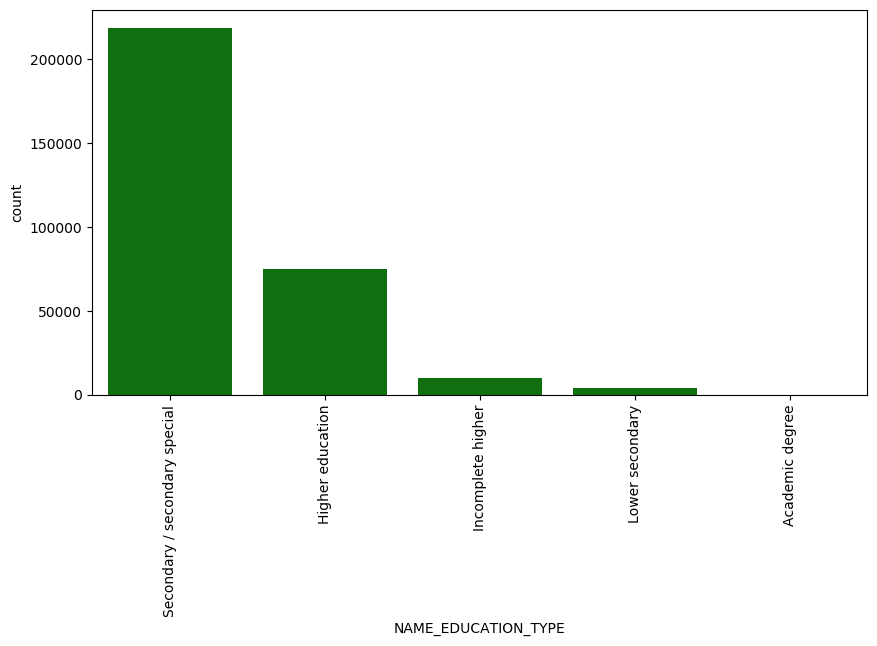

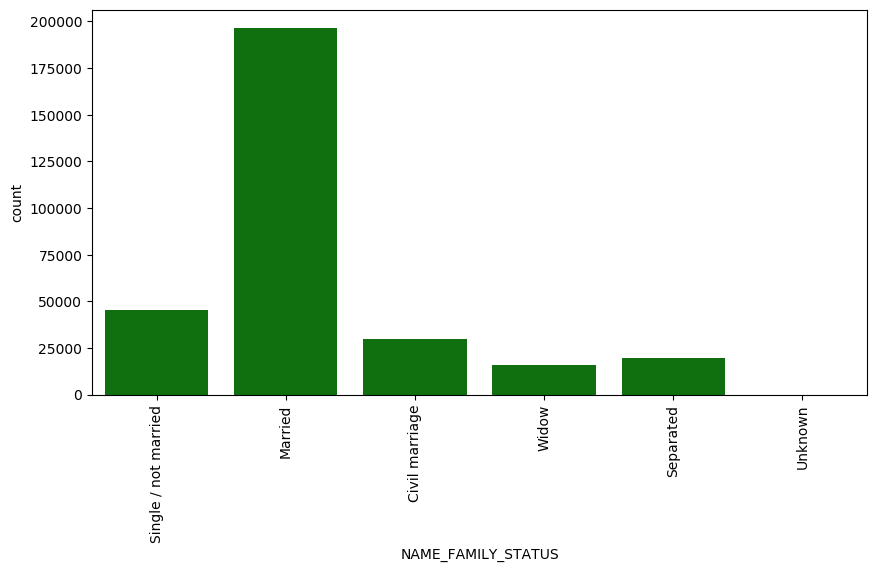

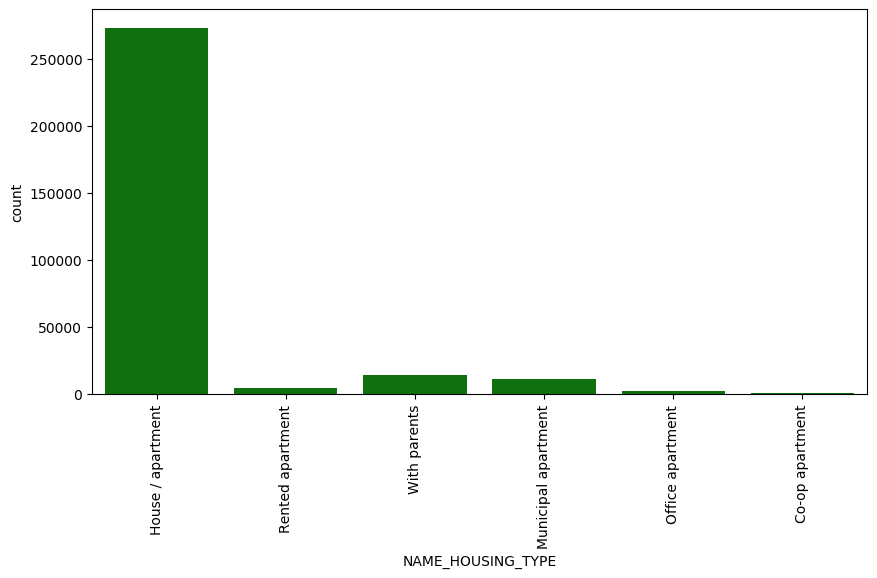

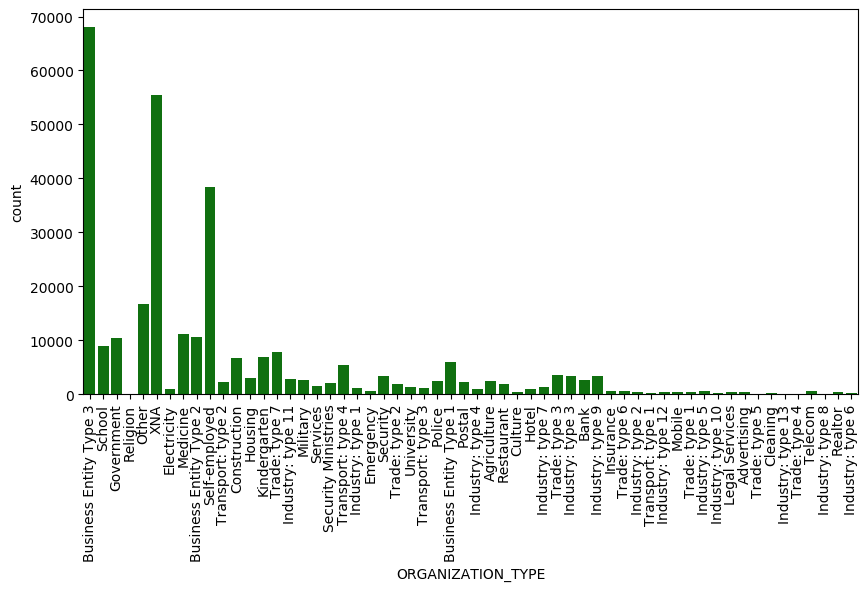

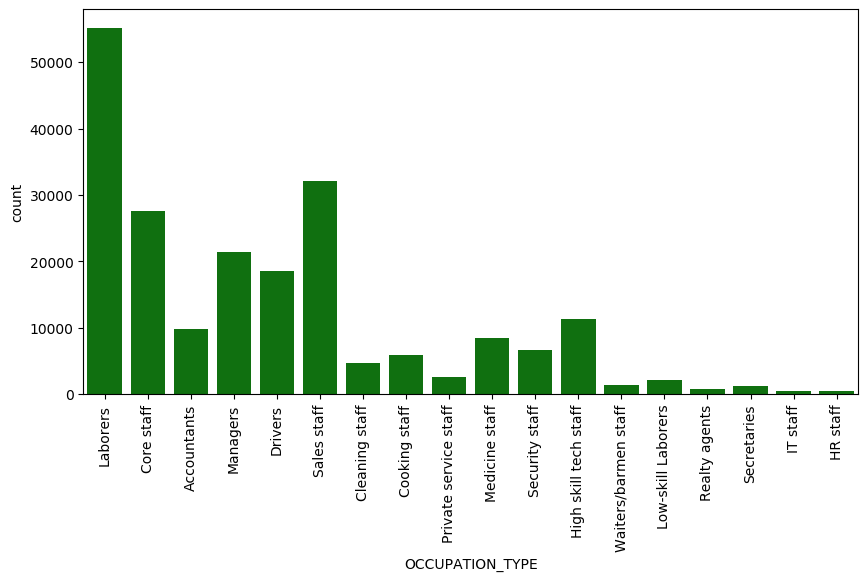

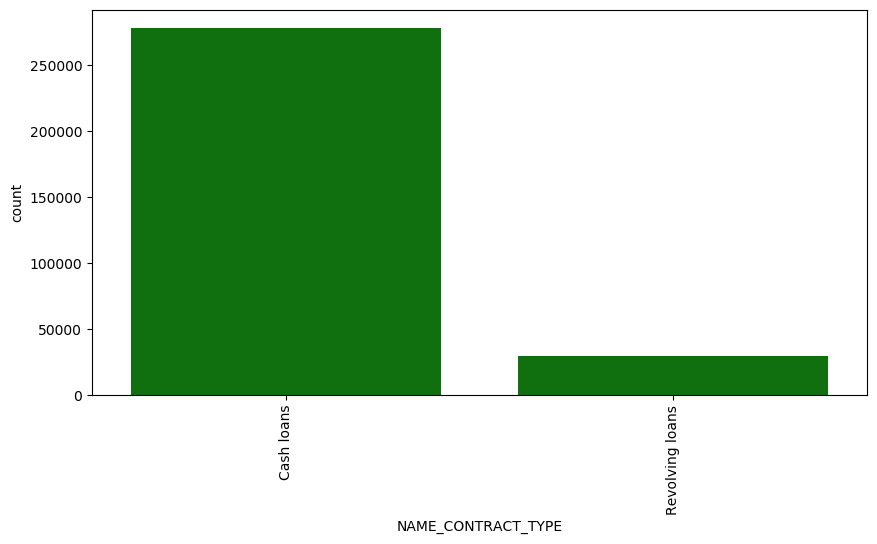

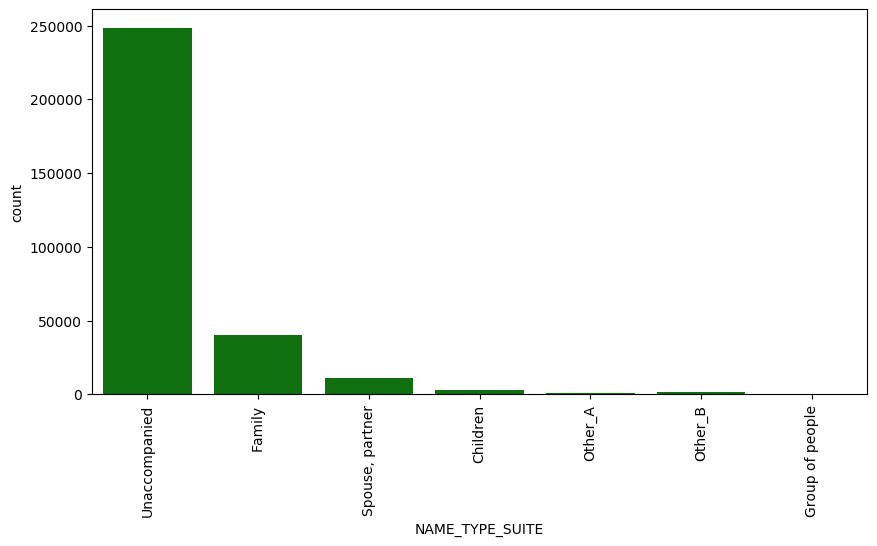

In [58]:
# For the categorical variables we create the visualization by running them in a loop

for column in catvar:
    
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x = column, data = df_applicant_profile, color = 'green')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

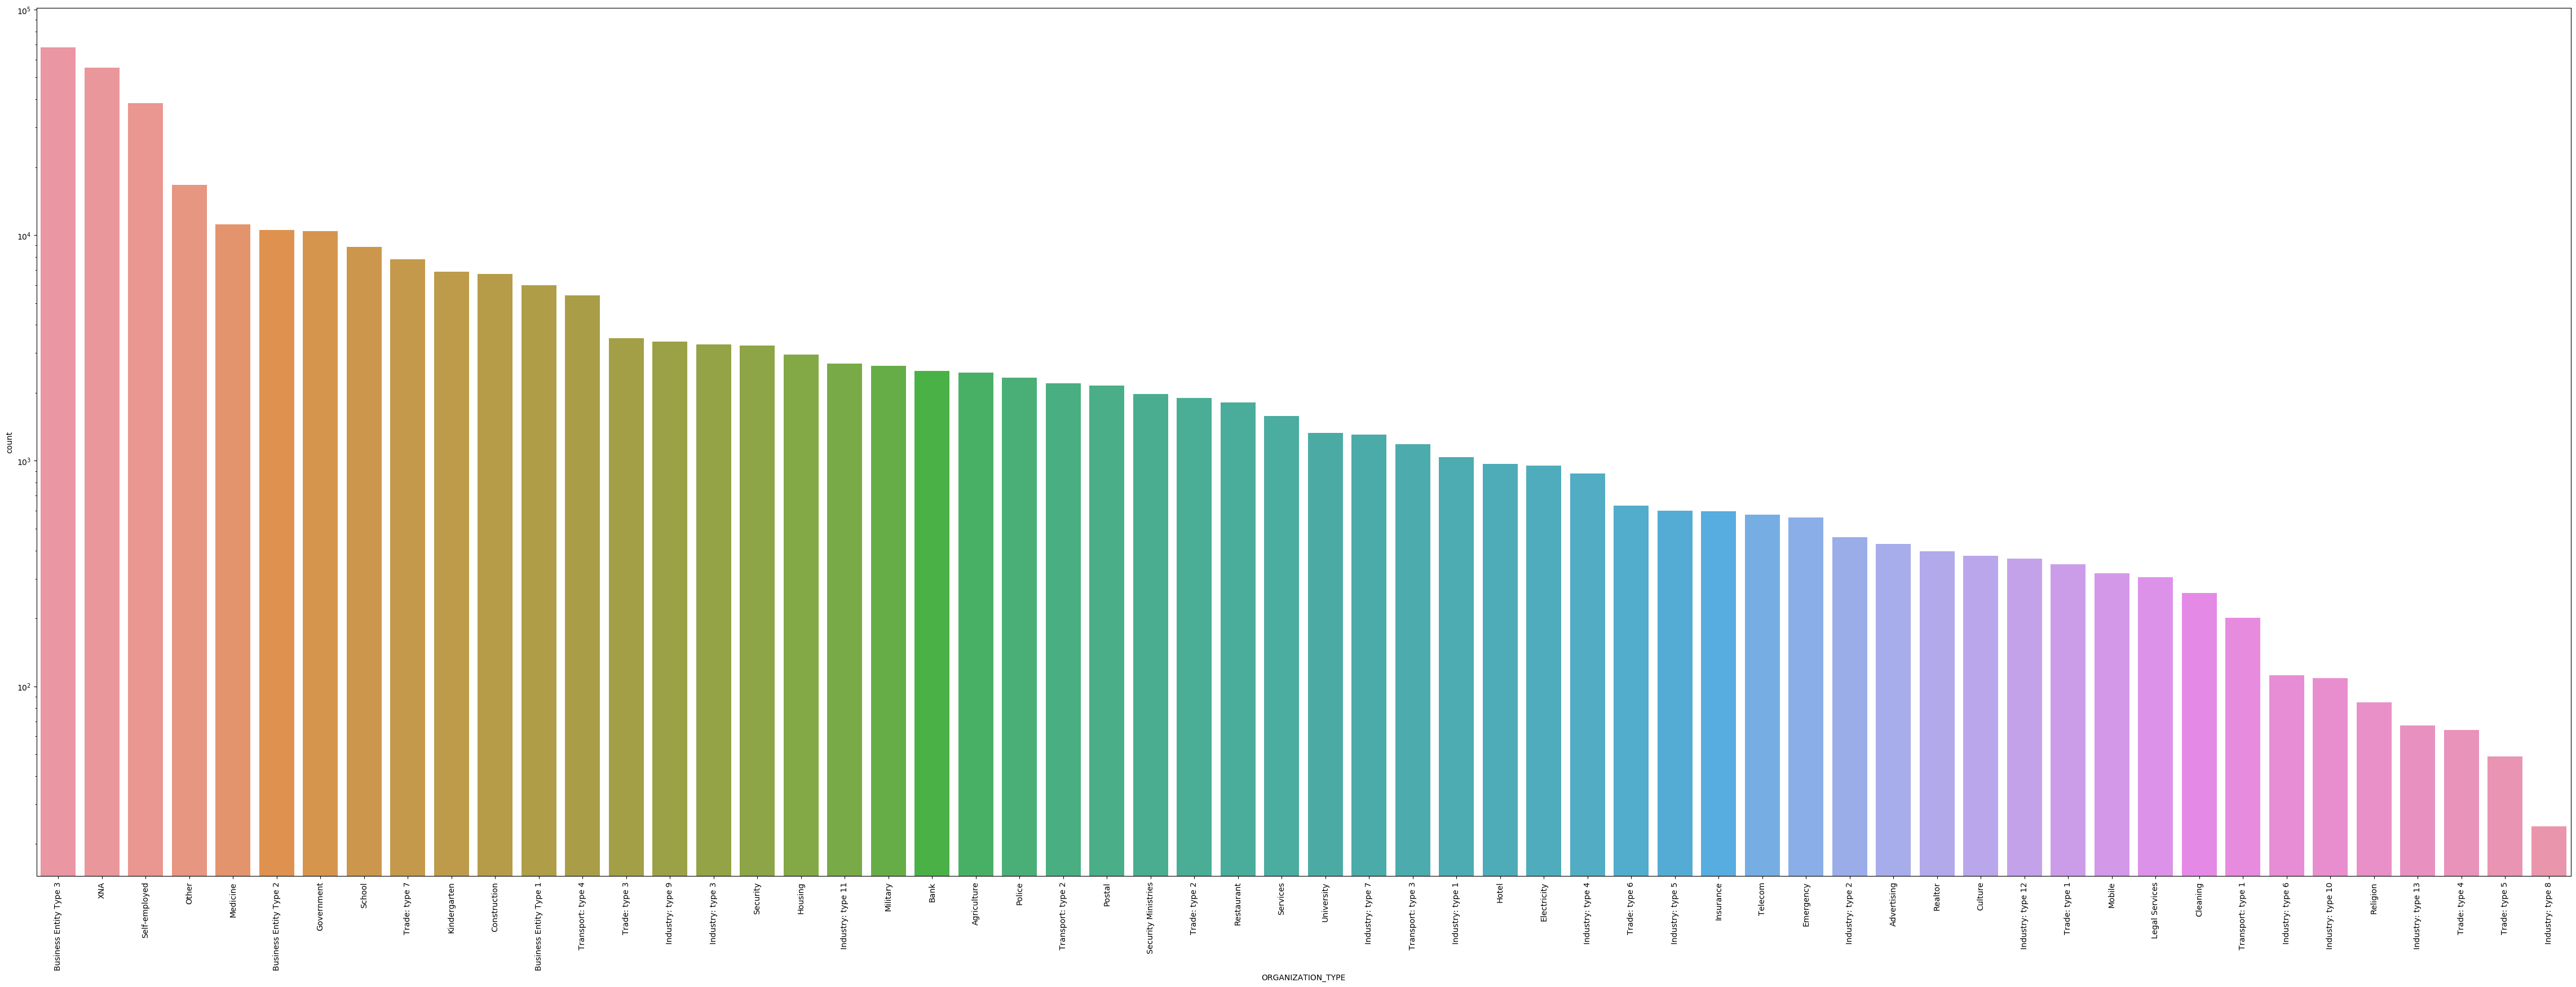

In [59]:
# Plot in Logarithmic Scale (only for ORGANIZATION_TYPE that has a long tail)

def plotunivariant(colval):
    width = len(df_applicant_profile[colval].unique()) 
    plt.figure(figsize=(width, 20))
    plt.yscale('log')
    plt.xticks(rotation = 90)
    sns.countplot(df_applicant_profile[colval].dropna(), order = df_applicant_profile[colval].value_counts().index);
    plt.show()
    
plotunivariant('ORGANIZATION_TYPE')

### 4B. Numerical Variables & Histograms:

In [60]:
# For numerical variables let us creat histograms

histvar = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE']

for column in histvar:
    maxval = df_applicant_profile[column].max()
    minval = df_applicant_profile[column].min()
    medianval = df_applicant_profile[column].median()
    if medianval <= 0: medianval = 1
    binsize = int((maxval - minval) / medianval)
    df_applicant_profile.hist(column = column, bins = binsize, grid=False, figsize=(12,8), color='#86bfad')

### 4C. Binning of Continuous Variables

In [61]:
# Plot the AMT_INCOME_TOTAL of the clients using a histogram

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df_applicant_profile['AMT_INCOME_RANGE'] = pd.cut(df_applicant_profile['AMT_INCOME_TOTAL'], bins, labels = slot)

In [62]:
df_aird = pd.DataFrame(columns=['SLOT', 'COUNT'])
df_aird['SLOT'] = slot

for i in slot:
    df_aird.loc[df_aird['SLOT'] == i, 'COUNT'] = df_applicant_profile[df_applicant_profile['AMT_INCOME_RANGE'] == i].shape[0]

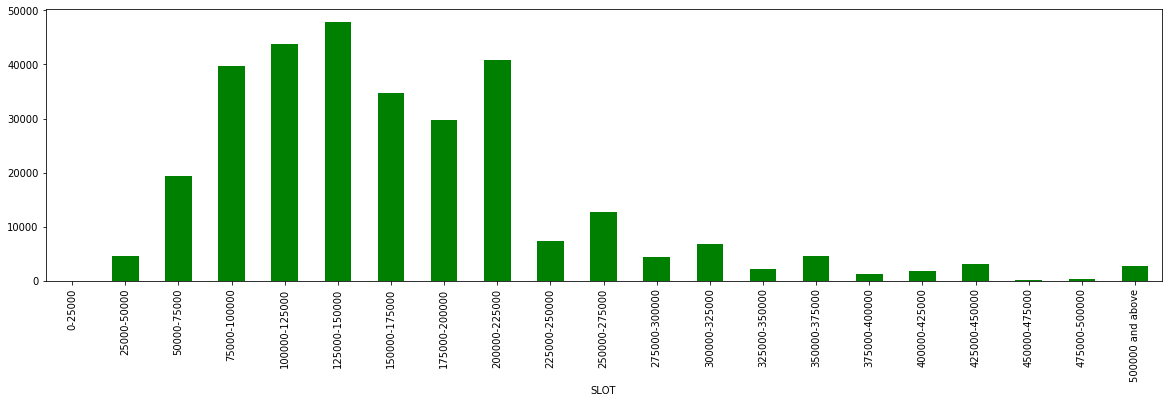

In [63]:
%matplotlib inline

df_aird.plot(figsize=(20,5), 
        kind = 'bar', 
        x = 'SLOT', 
        y = 'COUNT',
        legend = False, 
        color = 'green')

In [64]:
# Plot the AMT_CREDIT to the clients using a histogram

bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000,
                  550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000,
                  1050000, 1100000, 1150000, 1200000, 1250000, 1300000, 1350000, 1400000, 1450000, 1500000, 
                  1550000, 1600000, 1650000, 1700000, 1750000, 1800000, 1850000, 1900000, 1950000, 2000000, 5000000]

slot =  ['0-50000', '50000-100000', '100000-150000', '150000-200000', '200000-250000', '250000-300000', '300000-350000',
         '350000-400000', '400000-450000', '450000-500000', '500000-550000', '550000-600000', '600000-650000', 
         '650000-700000', '700000-750000', '750000-800000', '800000-850000', '850000-900000', '900000-950000', 
         '950000-1000000', '1000000-1050000', '1050000-1100000', '1100000-1150000', '1150000-1200000', '1200000-1250000', 
         '1250000-1300000', '1300000-1350000', '1350000-1400000', '1400000-1450000', '1450000-1500000', '1500000-1550000',
         '1550000-1600000', '1600000-1650000', '1650000-1700000', '1700000-1750000', '1750000-1800000', '1800000-1850000', 
         '1850000-1900000', '1900000-1950000', '1950000-2000000', '2000000 and above'] 

df_applicant_profile['AMT_CREDIT_RANGE'] = pd.cut(df_applicant_profile['AMT_CREDIT'], bins=bins, labels=slot)

In [65]:
df_acd = pd.DataFrame(columns=['SLOT', 'COUNT'])
df_acd['SLOT'] = slot

for i in slot:
    df_acd.loc[df_acd['SLOT'] == i, 'COUNT'] = df_applicant_profile[df_applicant_profile['AMT_CREDIT_RANGE'] == i].shape[0]

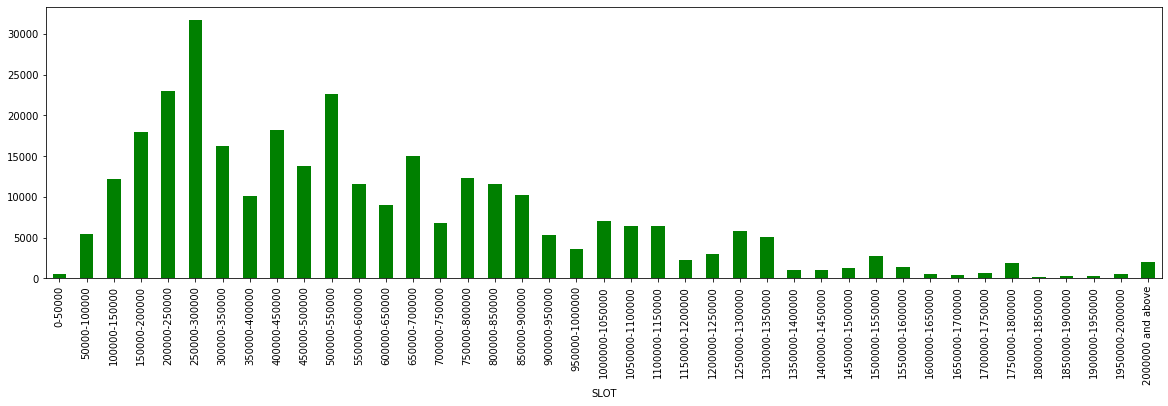

In [66]:
%matplotlib inline

df_acd.plot(figsize=(20,5), 
        kind = 'bar', 
        x = 'SLOT', 
        y = 'COUNT',
        legend = False, 
        color = 'green')

In [69]:
df_applicant_profile['APPLICANT_AGE'] = round(df_applicant_profile['DAYS_BIRTH'] * -1 / 365.25)

In [70]:
# Binning based on Age Group

bins = [18, 29, 49, 64, 80]
slot = ['Youth', 'Middle Age','Senior','Elderly']

df_applicant_profile['AGE_GROUP'] = pd.cut(df_applicant_profile['APPLICANT_AGE'], bins, labels = slot)

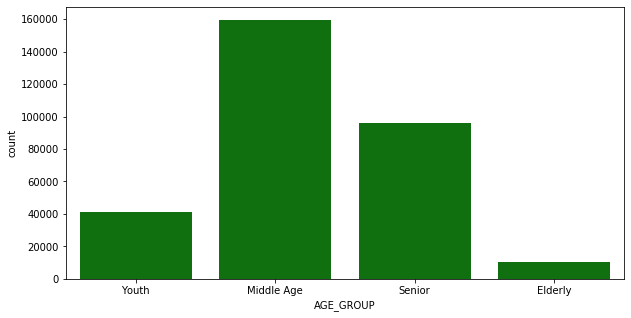

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'AGE_GROUP', data = df_applicant_profile, color = 'green')

### 4D. Analyzing the Outliers - Box Plots

For the above numerical variables we studied the outliers. We used `df_applicant_profile[column].describe()`

In [73]:
numvar = ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
          'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE']

df = df_applicant_profile[numvar]

df.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,OWN_CAR_AGE
count,307511.000000,3.075110e+05,307511.000000,307509.000000,307511.000000,307511.000000,3.075110e+05,307499.000000,3.072330e+05,104582.000000
mean,278180.518577,1.687979e+05,0.417052,2.152665,-16036.995067,63815.045904,5.990260e+05,27108.573909,5.383962e+05,12.061091
std,102790.175348,2.371231e+05,0.722121,0.910682,4363.988632,141275.766519,4.024908e+05,14493.737315,3.694465e+05,11.944812
min,100002.000000,2.565000e+04,0.000000,1.000000,-25229.000000,-17912.000000,4.500000e+04,1615.500000,4.050000e+04,0.000000
25%,189145.500000,1.125000e+05,0.000000,2.000000,-19682.000000,-2760.000000,2.700000e+05,16524.000000,2.385000e+05,5.000000
50%,278202.000000,1.471500e+05,0.000000,2.000000,-15750.000000,-1213.000000,5.135310e+05,24903.000000,4.500000e+05,9.000000
75%,367142.500000,2.025000e+05,1.000000,3.000000,-12413.000000,-289.000000,8.086500e+05,34596.000000,6.795000e+05,15.000000
max,456255.000000,1.170000e+08,19.000000,20.000000,-7489.000000,365243.000000,4.050000e+06,258025.500000,4.050000e+06,91.000000


__Outliers:__

| Field Name | Q1 - 25% | Q2: 50% | Q3: 75% | IQR = Q3 - Q1 | Q1 - 1.5 * IQR | Q3 + 1.5 * IQR | Number of Outliers |
|:---|---:|---:|---:|---:|---:|---:|---:|
|CNT_CHILDREN|0|0|1|1|-0.5|1.5|4272|
|CNT_FAM_MEMBERS|2|2|3|1|0.5|4.5|529|
|AMT_INCOME_TOTAL|112500|146997 |202500|90000|-22500|337500|14035|
|AMT_CREDIT|270000|513531|808650|538650|-537975|1616625|6562|
|OWN_CAR_AGE|5|9|15|10|-10|30|4932|
|AMT_ANNUITY|16524|24903|34596|18072|-10584|61704|7504|
|AMT_GOODS_PRICE|238500|450000|679500|441000|-423000 |1341000|14730|

In [74]:
%matplotlib inline

def boxplot(dataframe, column, outlier):
    
    df = dataframe[dataframe[column] <= outlier]
    sns.boxplot(data = df, x = column, orient='v', color='green')
    plt.show()

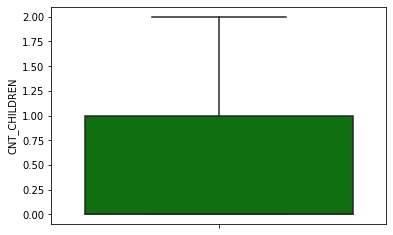

In [75]:
boxplot(df_applicant_profile, 'CNT_CHILDREN', 2)

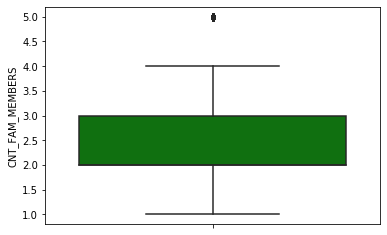

In [76]:
boxplot(df_applicant_profile, 'CNT_FAM_MEMBERS', 5)

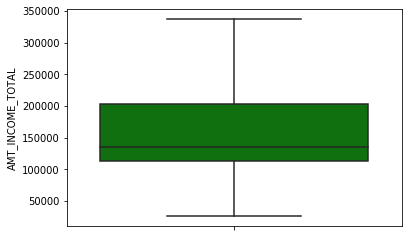

In [77]:
boxplot(df_applicant_profile, 'AMT_INCOME_TOTAL', 337500)

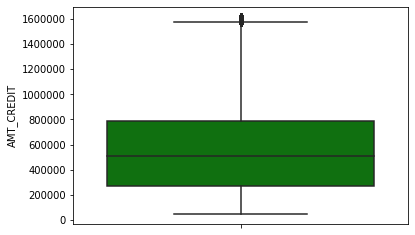

In [78]:
boxplot(df_applicant_profile, 'AMT_CREDIT', 1616625)

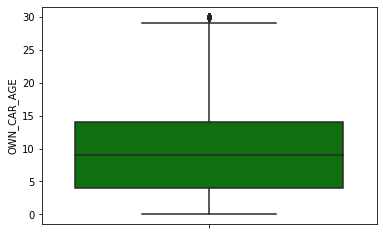

In [79]:
boxplot(df_applicant_profile, 'OWN_CAR_AGE', 30)

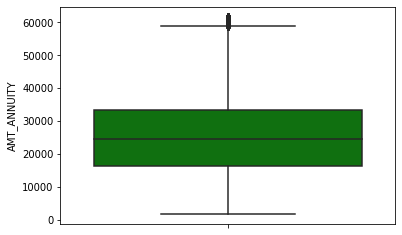

In [80]:
boxplot(df_applicant_profile, 'AMT_ANNUITY', 61704)

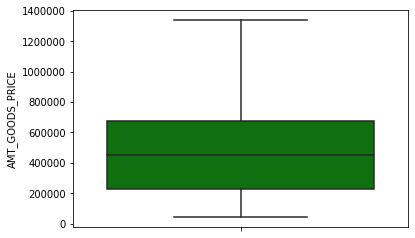

In [81]:
boxplot(df_applicant_profile, 'AMT_GOODS_PRICE', 1341000)

In [82]:
df_applicant_profile['APPLICANT_AGE'] = round(df_applicant_profile['DAYS_BIRTH'] * -1 / 365.25)

In [83]:
df_applicant_profile['APPLICANT_EXPERIENCE'] = round(df_applicant_profile['DAYS_EMPLOYED'] * -1 / 365.25)

In [84]:
df_applicant_profile.loc[df_applicant_profile['APPLICANT_EXPERIENCE'] == -1000, 'APPLICANT_EXPERIENCE'] = np.nan

In [85]:
df_applicant_profile['APPLICANT_EXPERIENCE'].describe()

count    252137.000000
mean          6.528435
std           6.407651
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          49.000000
Name: APPLICANT_EXPERIENCE, dtype: float64

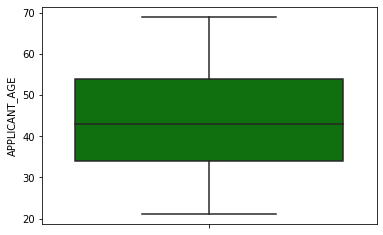

In [86]:
sns.boxplot(data = df_applicant_profile, x = 'APPLICANT_AGE', orient='v', color='green')

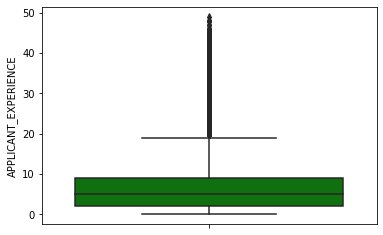

In [87]:
sns.boxplot(data = df_applicant_profile, x = 'APPLICANT_EXPERIENCE', orient='v', color='green')

## Step 5: Univariate Analysis - Previous Application Data

In [88]:
prev_app_essential = ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 
                      'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 
                      'NAME_CASH_LOAN_PURPOSE', 'NAME_PRODUCT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 
                      'NAME_CLIENT_TYPE', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

df_prev_app_essential = df_prev_app[prev_app_essential]

In [89]:
(df_prev_app_essential.isnull()).sum(axis = 0)

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_ANNUITY               372214
AMT_GOODS_PRICE           380429
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
NAME_CASH_LOAN_PURPOSE         0
NAME_PRODUCT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE           813172
NAME_CLIENT_TYPE               0
CNT_PAYMENT               372213
NAME_YIELD_GROUP               0
DAYS_LAST_DUE             664513
DAYS_TERMINATION          664513
dtype: int64

### 5A. Plotting the Categorical Variables

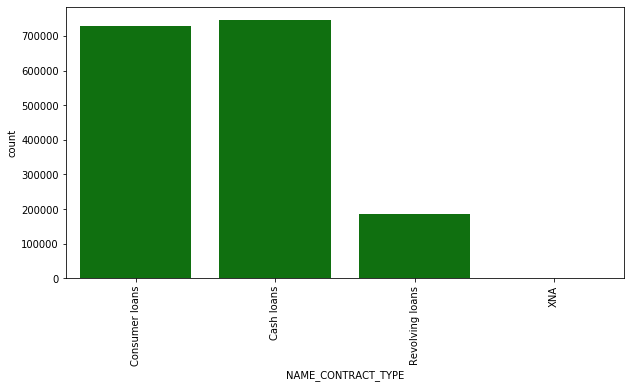

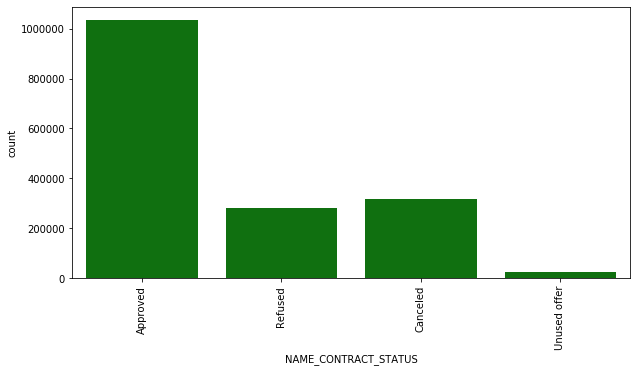

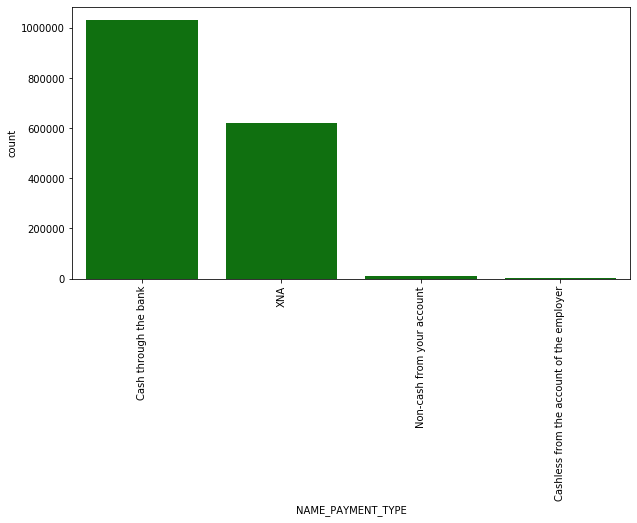

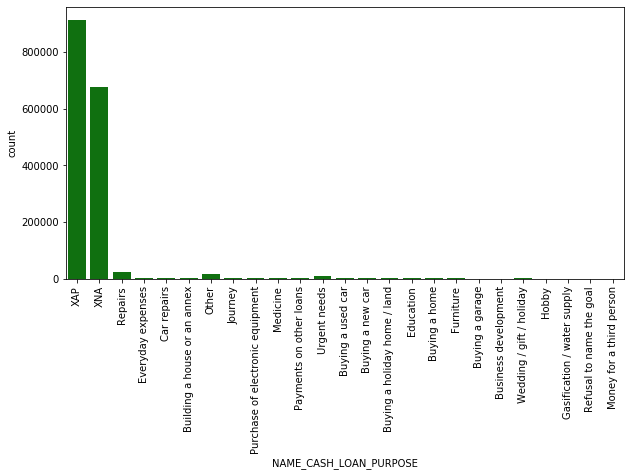

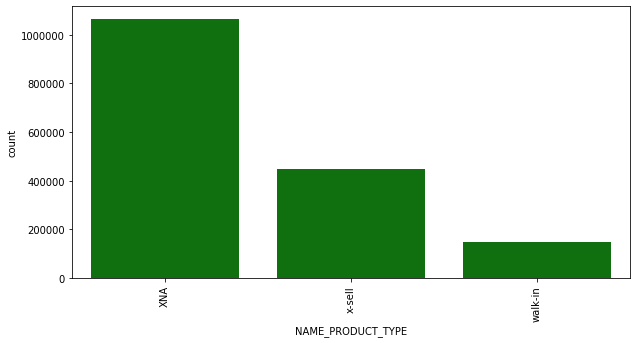

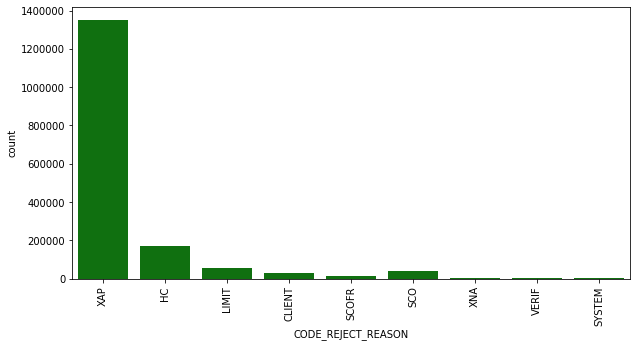

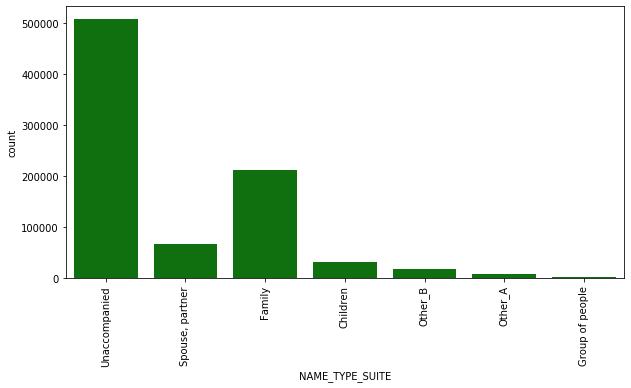

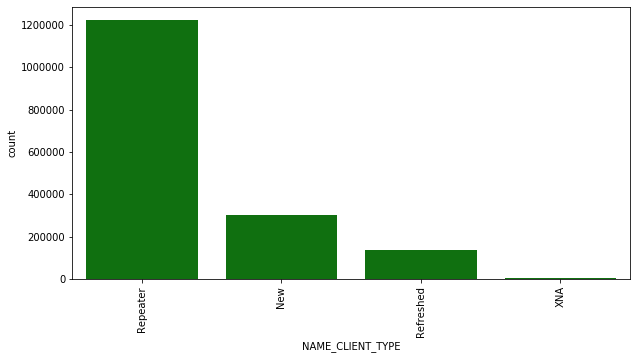

In [90]:
catvar2 = ['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CASH_LOAN_PURPOSE',
           'NAME_PRODUCT_TYPE','CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE']

for column in catvar2:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x = column, data = df_prev_app_essential, color = 'green')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

### 5B. Plotting the Numeric Variables

In [91]:
df_prev_app_approved = df_prev_app_essential[df_prev_app_essential.NAME_CONTRACT_STATUS == 'Approved']

In [92]:
(df_prev_app_approved.isnull()).sum(axis = 0)

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_ANNUITY                    4
AMT_GOODS_PRICE            42769
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
NAME_CASH_LOAN_PURPOSE         0
NAME_PRODUCT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE           371713
NAME_CLIENT_TYPE               0
CNT_PAYMENT                    4
NAME_YIELD_GROUP               0
DAYS_LAST_DUE              39604
DAYS_TERMINATION           39604
dtype: int64

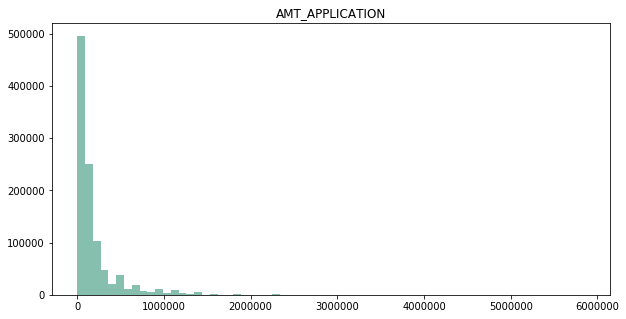

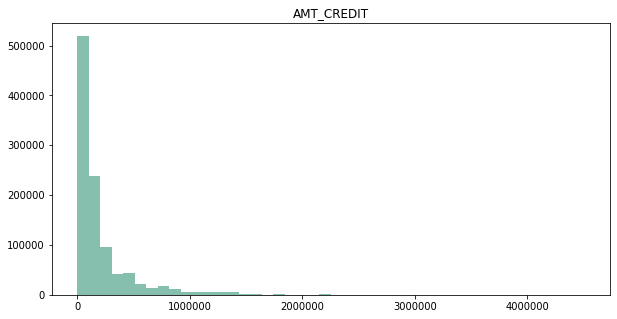

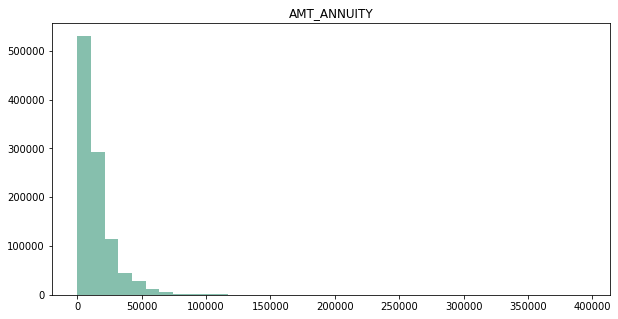

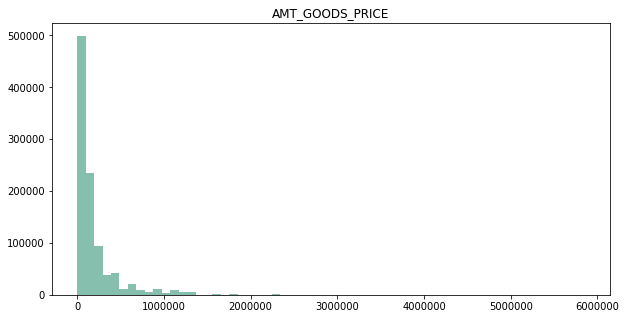

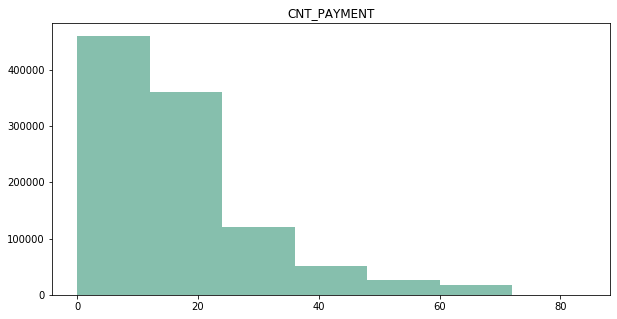

In [93]:
histvar2 = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

for column in histvar2:
    maxval = df_prev_app_approved[column].max()
    minval = df_prev_app_approved[column].min()
    medianval = df_prev_app_approved[column].median()
    if medianval <= 0: medianval = 1
    binsize = int((maxval - minval) / medianval)
    df_prev_app_approved.hist(column = column, bins = binsize, grid=False, figsize=(10, 5), color='#86bfad')

In [94]:
#['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

df_prev_app_approved['CNT_PAYMENT'].describe()

count    1.036040e+06
mean     1.411922e+01
std      1.196080e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      1.800000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

### 5C. Studying the Distribution

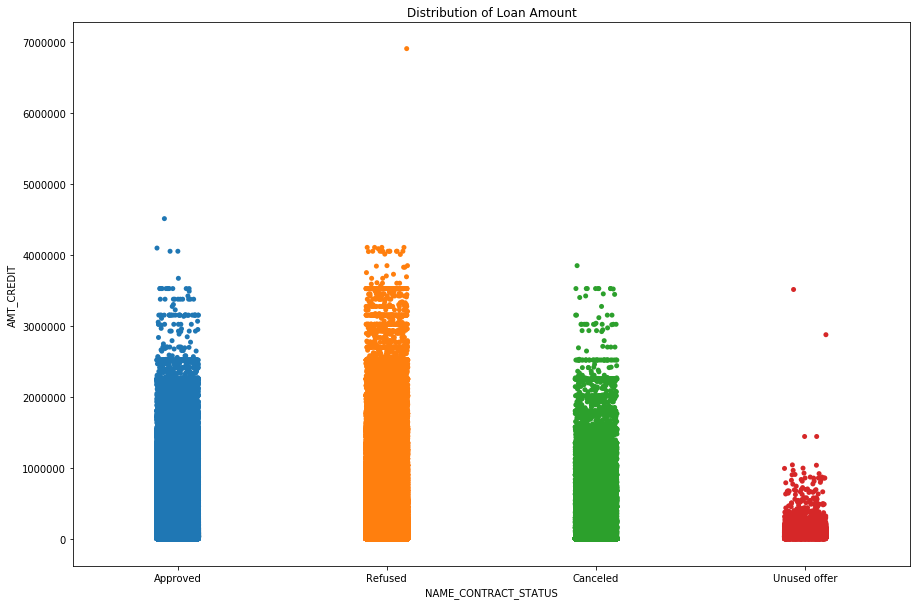

In [95]:
plt.figure(figsize=(15,10))
plt.title('Distribution of Loan Amount')
sns.stripplot(x = 'NAME_CONTRACT_STATUS', y = 'AMT_CREDIT', data = df_prev_app_essential, jitter=True);
plt.show()

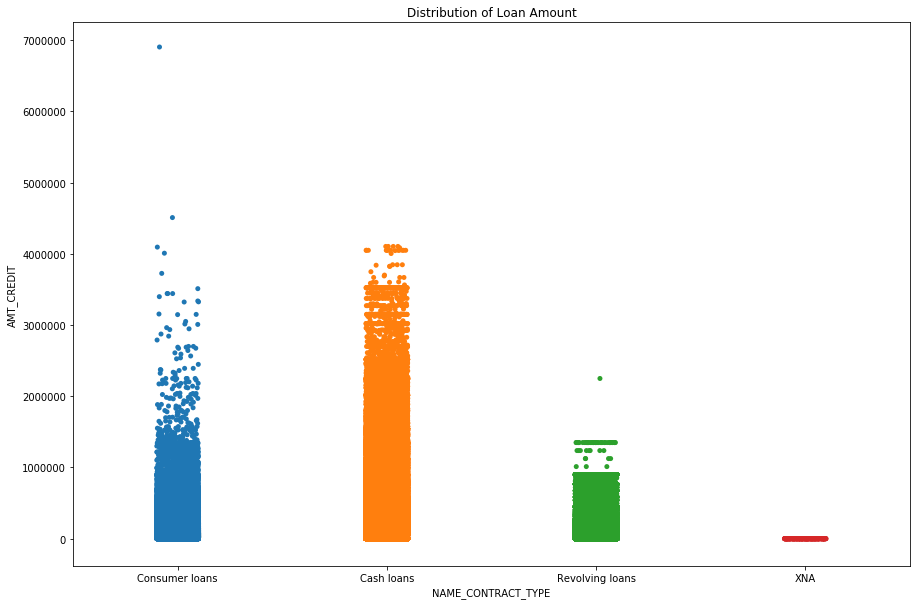

In [96]:
plt.figure(figsize=(15,10))
plt.title('Distribution of Loan Amount')
sns.stripplot(x = 'NAME_CONTRACT_TYPE', y = 'AMT_CREDIT', data = df_prev_app_essential, jitter=True);
plt.show()

## Step 6: Studying the Data Imbalance

The target variable of a dataset is the feature of a dataset about which we want to gain a deeper understanding. We need to understand what are the predictor variables that help us decide whether a client will have payment difficulty (1) or not (0). In our dataset, we have the target variable and also we have other attributes with which we should try to see what has contributed to the value of the target variable.

In [97]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

df_target0 = df_applicant_profile.loc[df_applicant_profile["TARGET"] == 0]
df_target1 = df_applicant_profile.loc[df_applicant_profile["TARGET"] == 1]

# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(df_target0)/len(df_target1),2)

11.39

In [98]:
df_target0.shape

(282686, 32)

In [99]:
df_target1.shape

(24825, 32)

The sample data provided has also imbalance on certain other variables.

 - The number of female applicants is more than the male applicants. 66% of the applicants are female and only 34% are male.
 - 69% of the applicants owned a house or a flat. 31% did not own a house or a flat. 
 - 66% of the applicants did not own a car. 
 - 71% of the applicants had only secondary education. Only 164 records (negligible) pertaining to clients with Academic Degree.
 - The sample given does not contain any consumer loans. It has only cash loans (90%) and revolving loans (10%).